<a href="https://colab.research.google.com/github/StefanoBergia/Tensorflow/blob/main/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [59]:
from tensorflow.keras.layers import Input,Dense,SimpleRNN
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

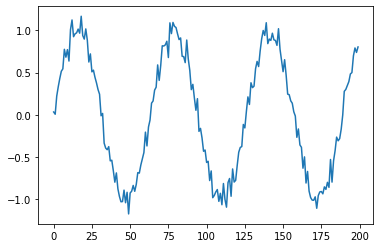

In [60]:
series= np.sin(0.1*np.arange(200)) +np.random.randn(200)*0.1

plt.plot(series)
plt.show()

In [61]:
T=10
D=1
X=[]
Y=  []
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)
X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)
print("X.shape",X.shape,"Y.shape",Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [62]:
i=Input(shape=(T,1))
x=SimpleRNN(5,activation='relu')(i)   #activation None, (è un regressore)
x=Dense(1)(x)
model=Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1)
)

r=model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:])
)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 104ms/step - loss: 0.6522 - val_loss: 0.0970
Epoch 2/80
3/3 [==============================] - 0s 15ms/step - loss: 0.1620 - val_loss: 0.1357
Epoch 3/80
3/3 [==============================] - 0s 17ms/step - loss: 0.2134 - val_loss: 0.1577
Epoch 4/80
3/3 [==============================] - 0s 15ms/step - loss: 0.2010 - val_loss: 0.1194
Epoch 5/80
3/3 [==============================] - 0s 15ms/step - loss: 0.1304 - val_loss: 0.0536
Epoch 6/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0918 - val_loss: 0.0947
Epoch 7/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0708 - val_loss: 0.0430
Epoch 8/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0755 - val_loss: 0.0570
Epoch 9/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0671 - val_loss: 0.0412
Epoch 10/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0488 - val_loss: 0.0472
Epoch 11/80
3/3 [======================

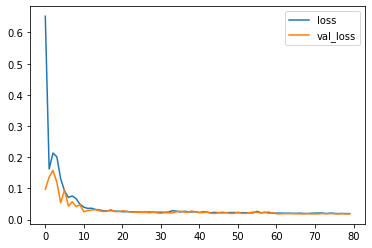

In [63]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [64]:
#wrong forecast using true targets (one step prediction)
validation_target=Y[-N//2:]
validation_predictions=[]

i=-N//2

while len(validation_predictions)<len(validation_target):
    p=model.predict(X[i].reshape(1,-1))[0,0]
    i+=1
    validation_predictions.append(p)

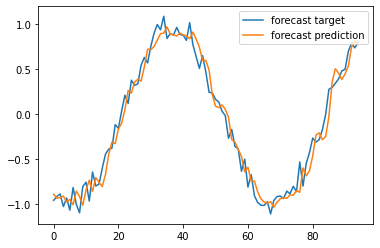

In [65]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()

In [66]:
#correct forecast (multi step prediction)
validation_target=Y[-N//2:]
validation_predictions=[]

last_x=X[-N//2]

while len(validation_predictions)<len(validation_target):
   p=model.predict(last_x.reshape(1,-1))[0,0]
   validation_predictions.append(p)
   
   #
   last_x=np.roll(last_x,-1)
   last_x[-1]=p

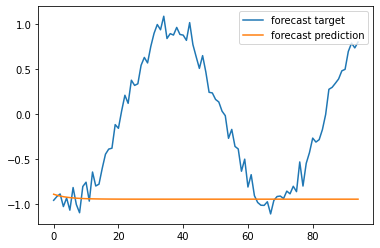

In [67]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()

#ATTENTION! prediction is copying previous values or repeating the same value